# Test glacier projections

Compare AR5 and AR6 projections with observations.

In [89]:
import importlib
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../code')
import func_misc as misc
import func_gic as gic

sys.path.append('../../../SLBudget/code/')
import SeaLevelContrib as slc

In [22]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [146]:
importlib.reload(slc)
importlib.reload(gic)

<module 'func_gic' from '/Users/dewilebars/Projects/Project_ProbSLR/SLProj/notebooks/../code/func_gic.py'>

In [18]:
def comp_plot_dist(X_ens, lo, hi, title_in, SCE):
    '''Easily compute the distribution, plot a histogram and table of percentile 
    values'''
    nbin = int(hi - lo)*20 
    X_pdf, bins = np.histogram(X_ens, bins=nbin, range=(lo, hi), density=True)
    bin_centers = (bins[1:] + bins[:-1])/2

    plt.bar(bin_centers, X_pdf, width=1)
    plt.ylabel('PDF')
    plt.title(title_in + ' for '+SCE)
    plt.show()
    
    Perc  = (1,5,10,17,20,50,80,83,90,95,99,99.5,99.9)
    perc = misc.perc_df(X_pdf, Perc, bin_centers)
    print("### Distribution ###")
    display(perc)
    
def plot_dist(X_ens, title_in, SCE):
    
    X_ens_df = pd.DataFrame(X_ens)
    X_ens_df.hist(bins=100)
    
    Perc  = np.array([1,5,10,17,20,50,80,83,90,95,99,99.5,99.9])
    perc_df = pd.DataFrame(X_ens_df.quantile(Perc/100))
    perc_df.index.name = 'Percentiles'
    perc_df.index = perc_df.index*100
    plt.ylabel('PDF')
    plt.title(f'{title_in} for {SCE}')
    plt.show()
    
    print("### Distribution ###")
    display(perc_df)

In [42]:
ROOT = '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/'

N = int(1e5)
start_date = 1980    # Start reading data
ys = 2006   # Starting point for the integration, if this is changed problems in functions
ye = 2100   # End year for computation

TIME2      = np.arange( ys, ye + 1, 1 )

GAM = 1
NormD  = np.random.normal(0, 1, N)

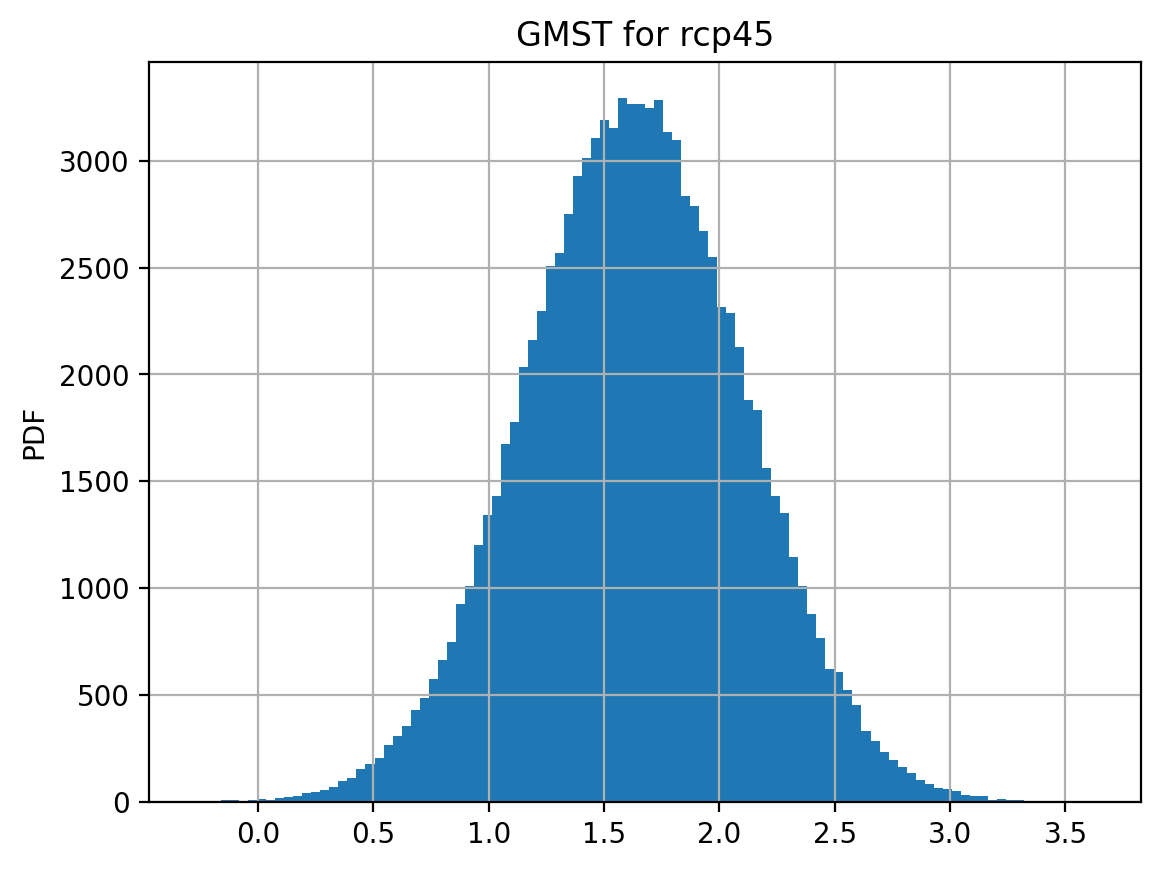

### Distribution ###


,0
Percentiles,
1.0,0.532269
5.0,0.861711
10.0,1.031077
17.0,1.182017
20.0,1.234894
50.0,1.631950
80.0,2.034339
83.0,2.086512
90.0,2.241713


In [196]:
#For CMIP5
LowPass = False
SCE_AR5 = 'rcp45'
ye = 2100

TGLOB = misc.make_tglob_array(ROOT, 'CMIP5', SCE_AR5, start_date, ye , LowPass)
TGLOBs = TGLOB.sel(time=slice(ys,None))
T_gic = TGLOBs - TGLOB.sel(time=2006) #.mean(dim='time')
Td_gic_CMIP5 = misc.normal_distrib(T_gic, GAM, NormD)
plot_dist(Td_gic_CMIP5[:,-1], 'GMST', SCE_AR5)

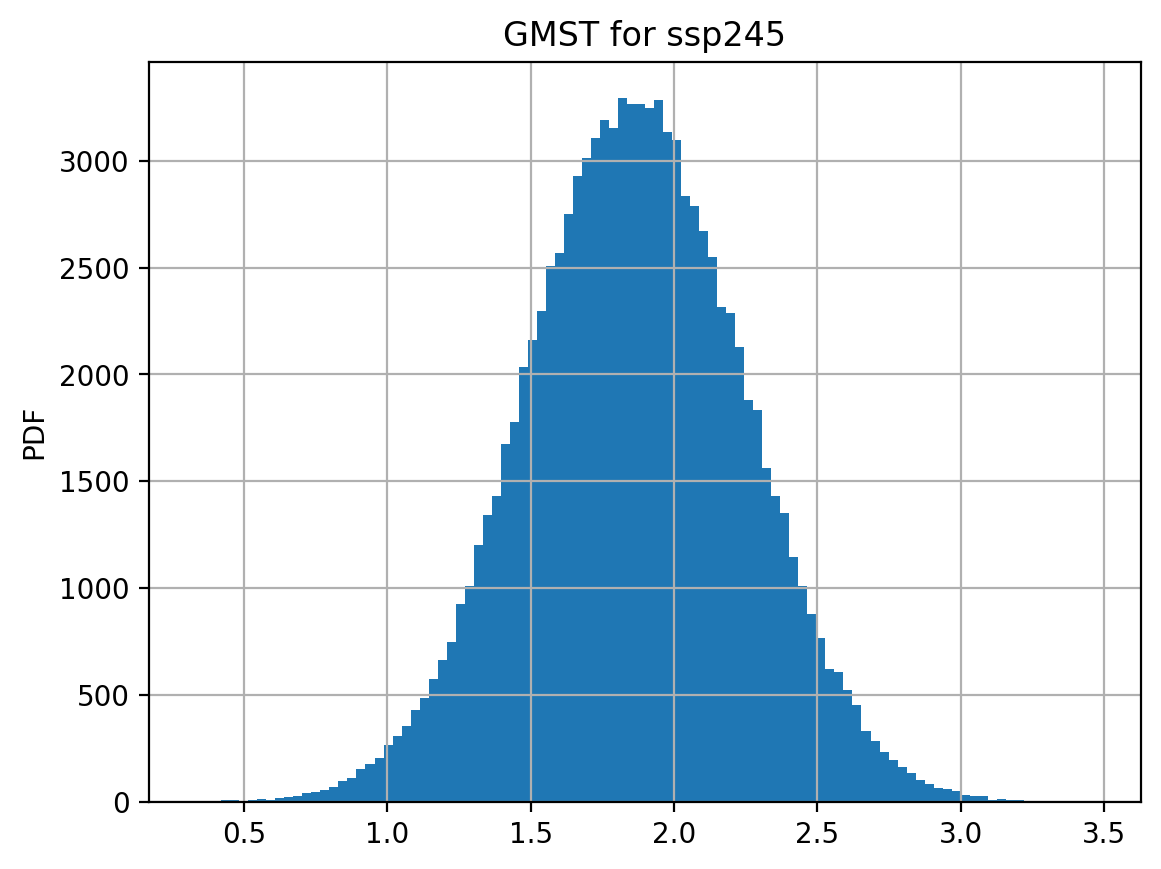

### Distribution ###


,0
Percentiles,
1.0,0.977761
5.0,1.242822
10.0,1.379090
17.0,1.500533
20.0,1.543077
50.0,1.862539
80.0,2.186291
83.0,2.228269
90.0,2.353140


In [195]:
#For AR6
LowPass = False
SCE_AR6 = 'ssp245'
ye = 2100

TGLOB = misc.make_tglob_array(ROOT, 'AR6', SCE_AR6, start_date, ye , LowPass)
TGLOBs = TGLOB.sel(time=slice(ys,None))
T_gic = TGLOBs - TGLOB.sel(time=2006)
Td_gic_AR6 = misc.normal_distrib(T_gic, GAM, NormD)
plot_dist(Td_gic_AR6[:,-1], 'GMST', SCE_AR6)

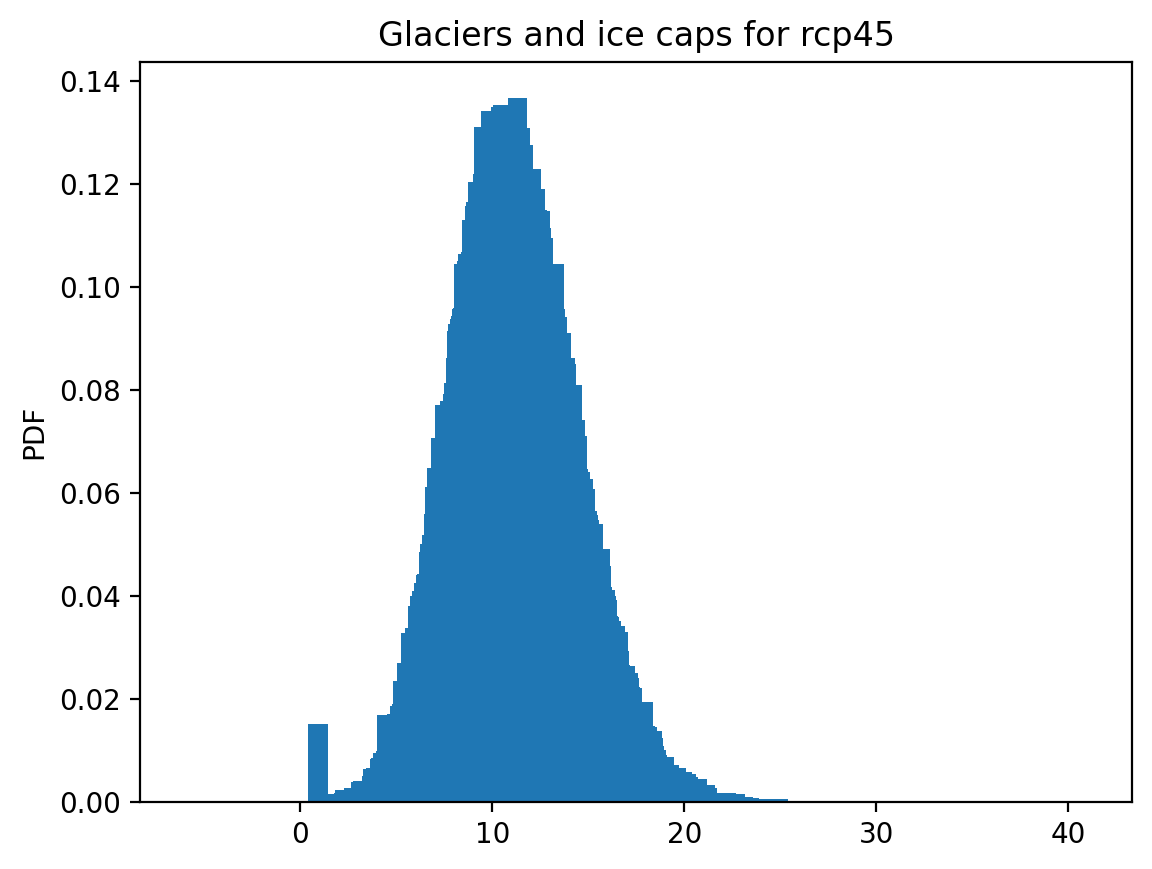

### Distribution ###


,values
percentiles,
1.0,4.425
5.0,6.275
10.0,7.275
17.0,8.175
20.0,8.475
50.0,10.975
80.0,13.725
83.0,14.125
90.0,15.225


In [197]:
X_gic_AR5 = gic.gic_ipcc(Td_gic_CMIP5, NormDs, 'AR5')

comp_plot_dist(X_gic_AR5[:,-1], -5.5, 40.5, 'Glaciers and ice caps', SCE_AR5)

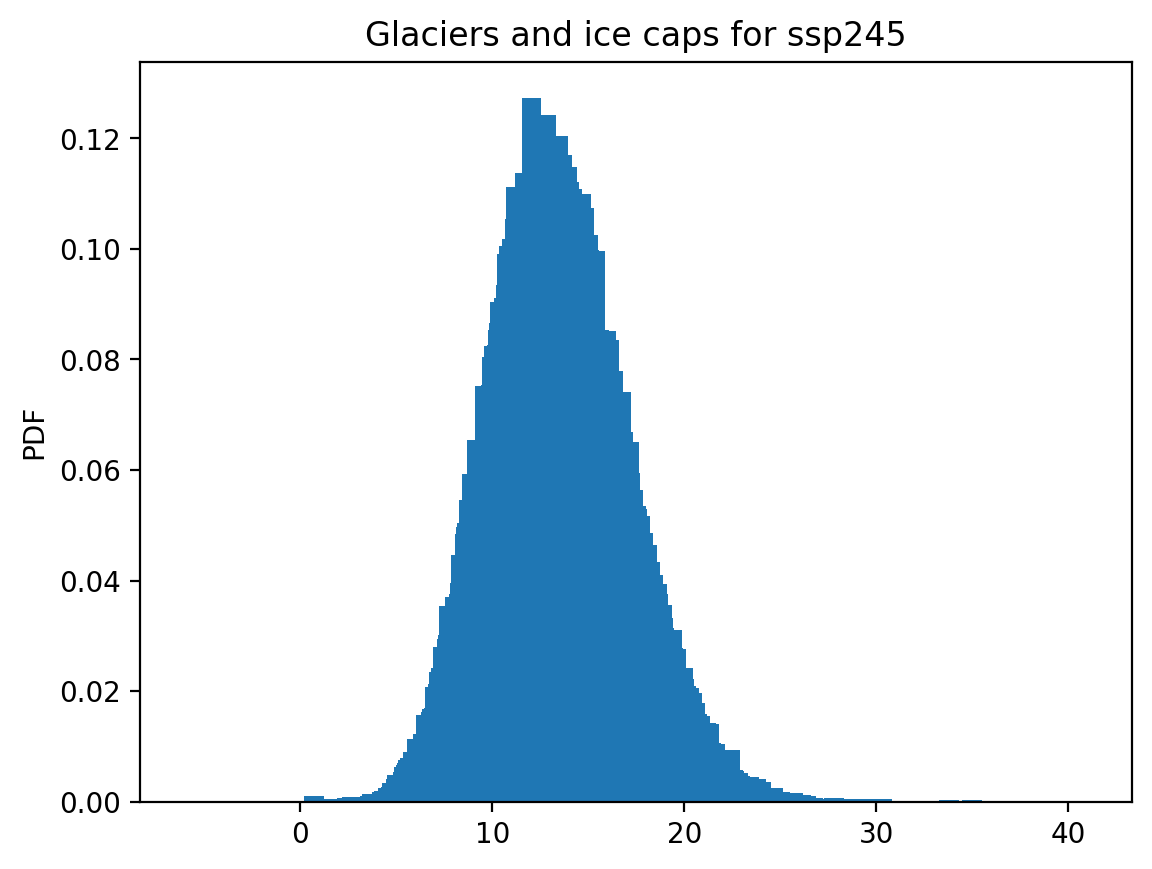

### Distribution ###


,values
percentiles,
1.0,6.075
5.0,8.025
10.0,9.075
17.0,10.075
20.0,10.475
50.0,13.225
80.0,16.325
83.0,16.725
90.0,18.025


In [198]:
NormDs  = np.random.normal(0, 1, N)

X_gic_AR6 = gic.gic_ipcc(Td_gic_AR6, NormDs, 'AR6')

comp_plot_dist(X_gic[:,-1], -5.5, 40.5, 'Glaciers and ice caps', SCE_AR6)

## Read some observational products for comparison

In [199]:
m15_glo_df = slc.glaciers_m15_glo()
m15_glo_df = m15_glo_df.rename(columns={"Glaciers":"Marzeion15"})

z19_glo_df = slc.glaciers_zemp19_glo()
z19_glo_df = z19_glo_df.rename(columns={"Glaciers":"Zemp19"})
z19_glo_df.index.name = "time"

f20_glo_df = slc.contrib_frederikse2020_glob("glac")
f20_glo_df = f20_glo_df.rename(columns={"Glaciers":"Frederikse20"})

obs_glo_df = f20_glo_df.join(z19_glo_df).join(m15_glo_df)

obs_glo_df = obs_glo_df - obs_glo_df.loc[1986:2005].mean()

In [200]:
obs_glo_df

,Frederikse20,Zemp19,Marzeion15
time,,,
1900,-6.994941,NaN,NaN
1901,-6.909953,NaN,NaN
1902,-6.823935,NaN,-5.692250
1903,-6.766781,NaN,-5.652795
1904,-6.682645,NaN,-5.603544
...,...,...,...
2014,1.221209,1.40311,NaN
2015,1.299695,1.51261,NaN
2016,1.370231,1.62291,NaN


## Plot time series

In [201]:
def sample2df(TIME2, X):
    
    Perc  = np.array([1,5,10,17,20,50,80,83,90,95,99,99.5,99.9])
    
    df = pd.DataFrame(X)

    perc_df = df.quantile(Perc/100).transpose()
    perc_df.index = TIME2
    perc_df.index.name = "Time"
    
    return perc_df

In [202]:
gic_AR5_perc = sample2df(TIME2, X_gic_AR5)
gic_AR6_perc = sample2df(TIME2, X_gic_AR6)

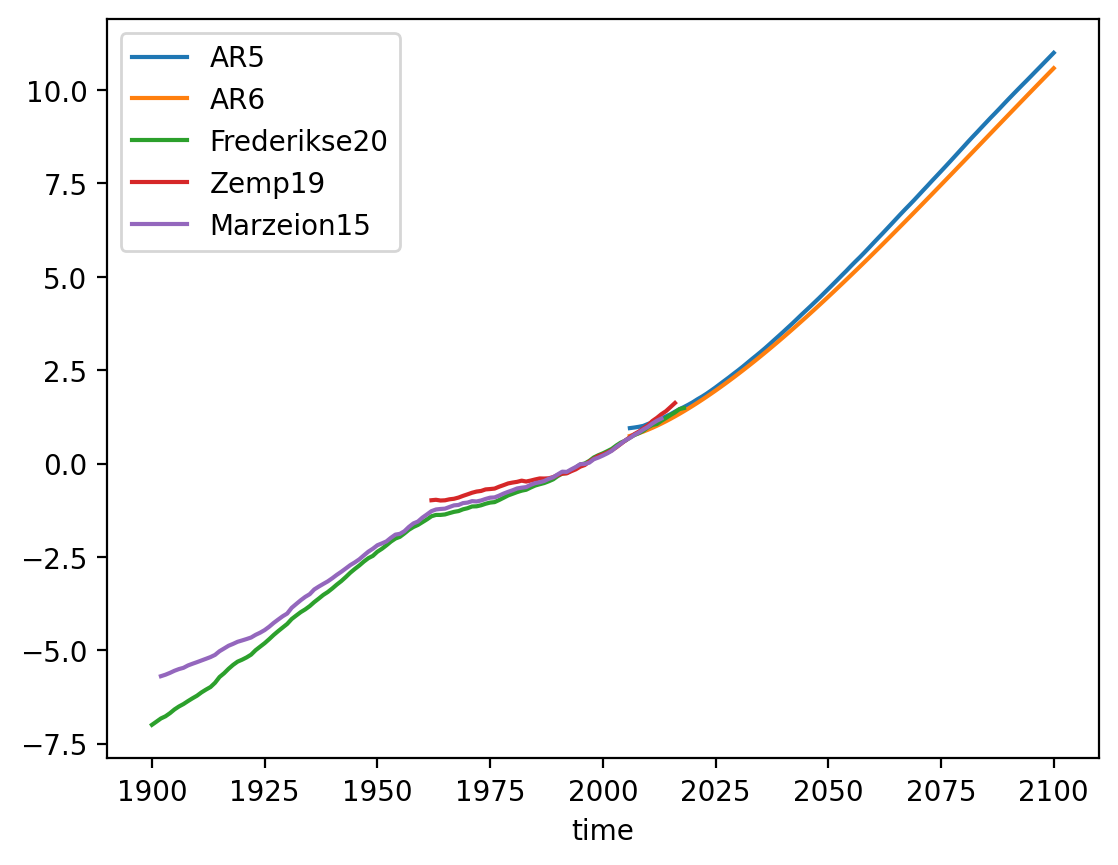

In [203]:
fig, ax = plt.subplots()

gic_AR5_perc[0.500].plot(label="AR5", ax=ax)
gic_AR6_perc[0.500].plot(label="AR6", ax=ax)

obs_glo_df.plot(ax=ax)

plt.legend()

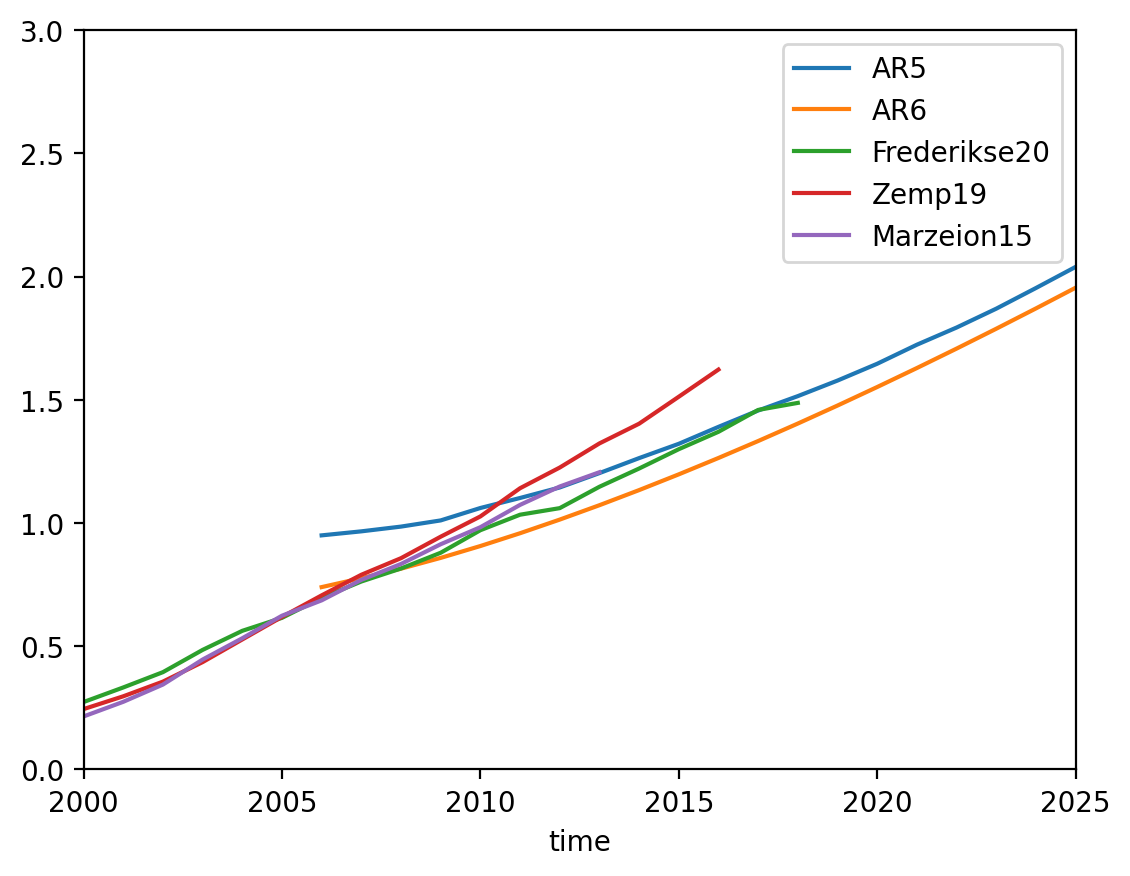

In [206]:
fig, ax = plt.subplots()

gic_AR5_perc[0.500].plot(label="AR5", ax=ax)
gic_AR6_perc[0.500].plot(label="AR6", ax=ax)

obs_glo_df.plot(ax=ax)

ax.set_xlim([2000,2025])
ax.set_ylim([0,3])
plt.legend()